# Project 1- Performance Analysis & Recommendation
## Analyzing how the pandemic has had an impact on the airline industry vs the overall market

## Part 1- Performance Analysis

### Is the industry performance a reflection of the entire sector?
* Overall Market Analysis- SPY
* Industrials Sector Analysis- XLI
* Airlines Industry Analysis- JETS

In [115]:
# Imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

import panel as pn
pn.extension('plotly')
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

In [116]:
# Read SPY Data and get rid of extra columns 
SPY_Data= pd.read_csv("SPY.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
SPY_Data = SPY_Data.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
SPY_Data.head()

,Close
Date,
2020-03-02,309.089996
2020-03-03,300.239990
2020-03-04,312.859985
2020-03-05,302.459991
2020-03-06,297.459991


In [117]:
# Read XLI Data and get rid of extra columns 
XLI_Data= pd.read_csv("XLI.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
XLI_Data = XLI_Data.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
XLI_Data.head()

,Close
Date,
2020-03-02,75.650002
2020-03-03,73.800003
2020-03-04,76.849998
2020-03-05,73.089996
2020-03-06,72.449997


In [118]:
# Read JETS Data and get rid of extra columns 
JETS_Data= pd.read_csv("JETS.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
JETS_Data = JETS_Data.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
JETS_Data.head()

,Close
Date,
2020-03-02,23.750000
2020-03-03,23.240000
2020-03-04,23.809999
2020-03-05,21.660000
2020-03-06,21.930000


In [119]:
# Check data types
SPY_Data.dtypes

Close    float64
dtype: object

In [120]:
XLI_Data.dtypes

Close    float64
dtype: object

In [121]:
JETS_Data.dtypes

Close    float64
dtype: object

In [122]:
# Calculate SPY Daily Returns
SPY_Returns= SPY_Data.pct_change()
SPY_Returns.head()

,Close
Date,
2020-03-02,NaN
2020-03-03,-0.028632
2020-03-04,0.042033
2020-03-05,-0.033242
2020-03-06,-0.016531


In [123]:
# Rename `Close` Column to be specific to this stock and drop nulls.
SPY_Returns.columns=["SPY"]
SPY_Returns.dropna(inplace=True)
SPY_Returns.head()

,SPY
Date,
2020-03-03,-0.028632
2020-03-04,0.042033
2020-03-05,-0.033242
2020-03-06,-0.016531
2020-03-09,-0.078094


In [124]:
# Calculate XLI Daily Returns
XLI_Returns= XLI_Data.pct_change()
XLI_Returns.head()

,Close
Date,
2020-03-02,NaN
2020-03-03,-0.024455
2020-03-04,0.041328
2020-03-05,-0.048927
2020-03-06,-0.008756


In [125]:
# Rename `Close` Column to be specific to this stock and drop nulls.
XLI_Returns.columns=["XLI"]
XLI_Returns.dropna(inplace=True)
XLI_Returns.head()

,XLI
Date,
2020-03-03,-0.024455
2020-03-04,0.041328
2020-03-05,-0.048927
2020-03-06,-0.008756
2020-03-09,-0.092202


In [126]:
# Calculate JETS Daily Returns
JETS_Returns= JETS_Data.pct_change()
JETS_Returns.head()

,Close
Date,
2020-03-02,NaN
2020-03-03,-0.021474
2020-03-04,0.024527
2020-03-05,-0.090298
2020-03-06,0.012465


In [127]:
# Rename `Close` Column to be specific to this stock and drop nulls.
JETS_Returns.columns=["JETS"]
JETS_Returns.dropna(inplace=True)
JETS_Returns.head()

,JETS
Date,
2020-03-03,-0.021474
2020-03-04,0.024527
2020-03-05,-0.090298
2020-03-06,0.012465
2020-03-09,-0.067943


## Conduct Quantitative Analysis

### Performance Analysis

In [128]:
# Join SPY Returns, XLI Returns, and the JETS Returns into a single DataFrame with columns for each stock's returns.
Combined_Returns = pd.concat([SPY_Returns, XLI_Returns, JETS_Returns], axis='columns', join='inner')
Combined_Returns.dropna(inplace=True)
Combined_Returns.head()

,SPY,XLI,JETS
Date,,,
2020-03-03,-0.028632,-0.024455,-0.021474
2020-03-04,0.042033,0.041328,0.024527
2020-03-05,-0.033242,-0.048927,-0.090298
2020-03-06,-0.016531,-0.008756,0.012465
2020-03-09,-0.078094,-0.092202,-0.067943


In [129]:
# Plot cumulative returns with an hvplot
Combined_Returns.hvplot.line(xlabel="Date", ylabel="Daily Return", width= 1000)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

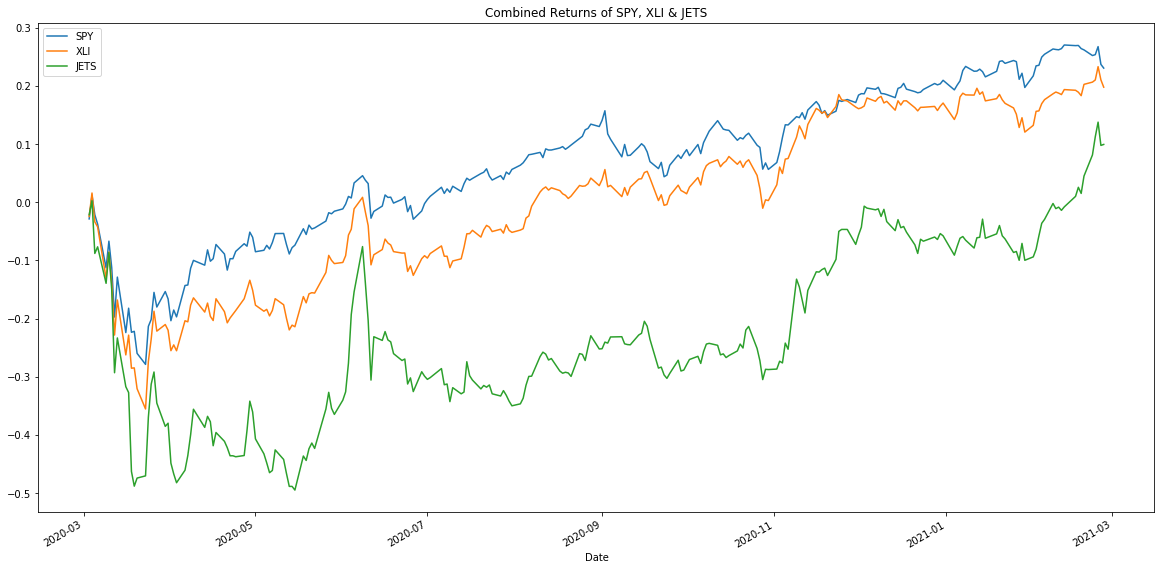

In [130]:
# Calculate and plot cumulative returns of the combined returns
Combined_Returns = (1 + Combined_Returns.sort_index()).cumprod()-1
# Plot cumulative returns
Combined_Returns.plot(figsize=(20,10), title= "Combined Returns of SPY, XLI & JETS")

### Risk Analysis

#### Standard Deviation

In [131]:
# Calculate the daily standard deviation of each stock
Combined_Returns_std = Combined_Returns.std()
Combined_Returns_std

SPY     0.126344
XLI     0.140030
JETS    0.144962
dtype: float64

In [132]:
Combined_Returns.rolling(window=21).std().hvplot(figsize=[20,10], title="Rolling 21-Day Standard Deviation")

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

#### Volatility

In [133]:
# Plot cumulative returns on a density plot to see volatility
Combined_Returns.hvplot.density()

:NdOverlay   [Variable]
   :Distribution   [value]   (Density)

#### Correlation

In [134]:
# Calculate the correlation of all stocks
Combined_Returns.corr()

,SPY,XLI,JETS
SPY,1.000000,0.975881,0.822084
XLI,0.975881,1.000000,0.887120
JETS,0.822084,0.887120,1.000000


In [135]:
Combined_Returns.hvplot(kind="scatter", x="SPY", y="JETS", color="orange")

:Scatter   [SPY]   (JETS)

#### Beta between SPY and XLI

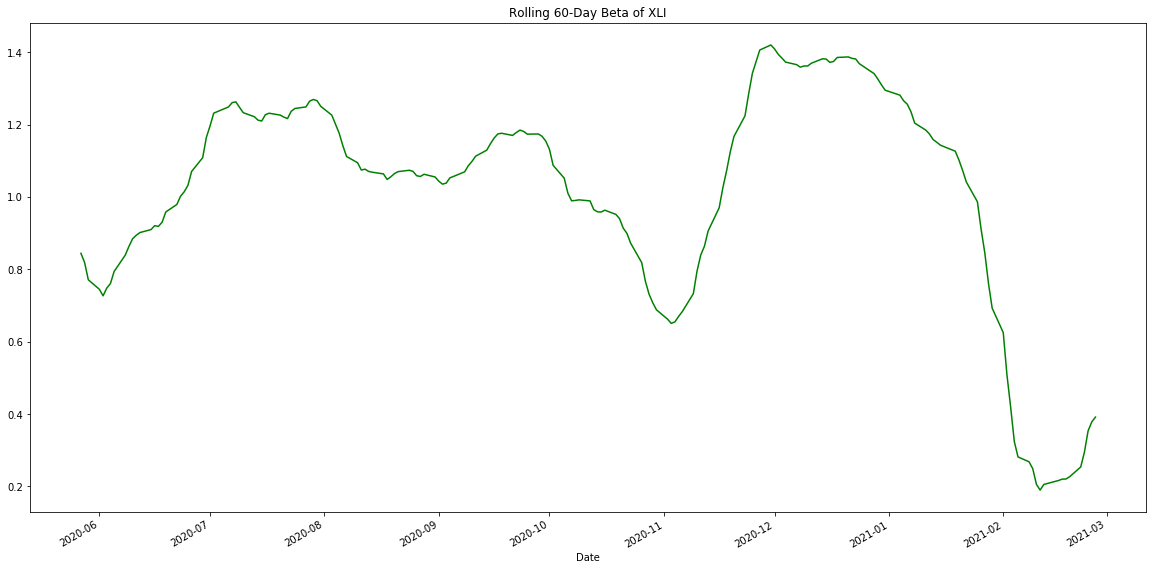

In [136]:
# Calculate covariance of a single stock
Covariance_XLI = Combined_Returns["XLI"].rolling(window=60).cov(Combined_Returns["SPY"])
# Calculate variance of SPY
Variance_SPY = Combined_Returns["SPY"].rolling(window=60).var()
# Computing beta
Rolling_Beta_XLI = Covariance_XLI/Variance_SPY
# Plot beta trend
Rolling_Beta_XLI.plot(figsize=(20, 10), title="Rolling 60-Day Beta of XLI", color= "green")

#### Beta between SPY and JETS

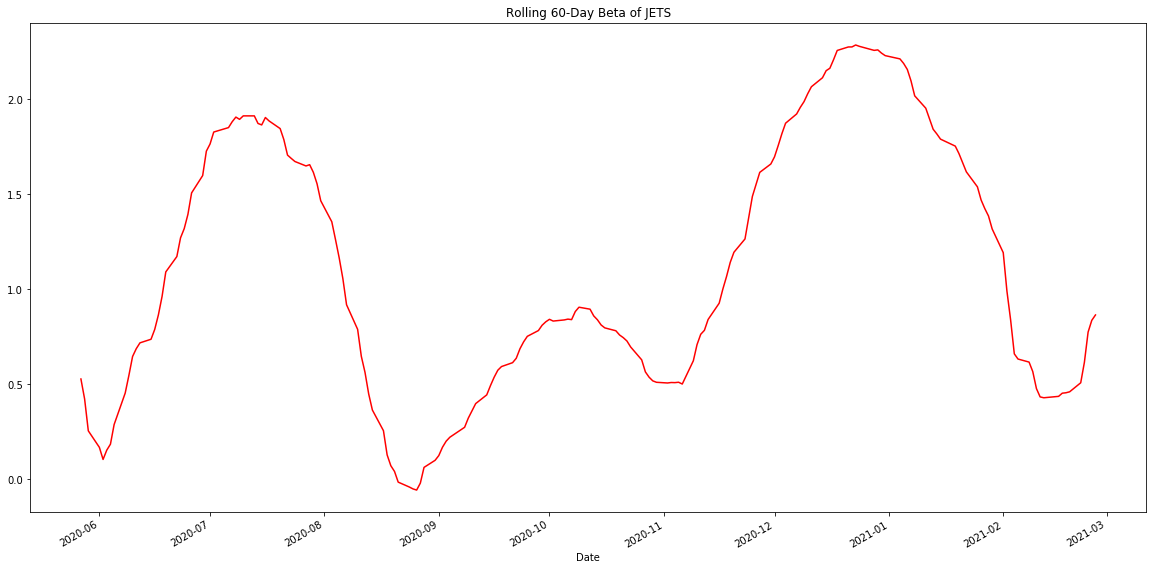

In [137]:
# Calculate covariance of a single stock
Covariance_JETS = Combined_Returns["JETS"].rolling(window=60).cov(Combined_Returns["SPY"])
# Calculate variance of SPY
Variance_SPY = Combined_Returns["SPY"].rolling(window=60).var()
# Computing beta
Rolling_Beta_JETS = Covariance_JETS/Variance_SPY
# Plot beta trend
Rolling_Beta_JETS.plot(figsize=(20, 10), title="Rolling 60-Day Beta of JETS", color= "red")

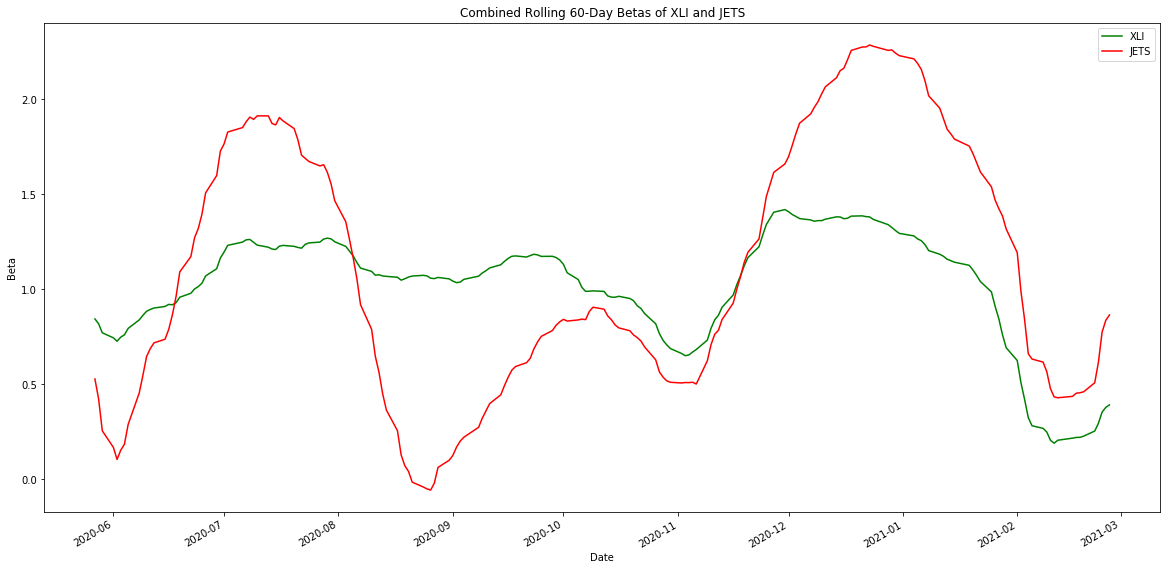

In [138]:
# Plotting both the curves simultaneously
Rolling_Beta_XLI.plot(figsize=(20,10), color= "green", label= "XLI")
Rolling_Beta_JETS.plot(figsize=(20,10),color= "red", label= "JETS")
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Date")
plt.ylabel("Beta")
plt.title("Combined Rolling 60-Day Betas of XLI and JETS")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()                                                                        

### Sharpe Ratios

In [139]:
# Annualized Sharpe Ratios
Sharpe_Ratios = (Combined_Returns.mean() * 252) / (Combined_Returns.std() * np.sqrt(252))
Sharpe_Ratios

SPY      8.369300
XLI      0.182220
JETS   -25.152618
dtype: float64

In [140]:
# Visualize the Sharpe Ratios as a bar plot
Sharpe_Ratios.hvplot(kind="bar", title="Sharpe Ratio", color="purple")

:Bars   [index]   (0)

# Conclusion- Performance Analysis

### Covid 19 Timeline
* **Jan-March 2020- pre-covid**: WHO Announces Mysterious Coronavirus-Related Pneumonia in China then CDC Says COVID-19 Is Heading Toward Pandemic Status 
* **March- April 2020- covid**: The world shuts down; borders close, sports teams cancel seasons, schools close and employees go home
* **June- November 2020- second wave**: As states begin to reopen, cases begin to skyrocket again so states reverse reopening plans. Unemployment rises, mental health crisis escalates but vaccine research looks promising
* **December 2020- vaccine**: The FDA authorizes two vaccines; Pfizer and Moderna
* **Jan- March 2021- post-vaccine**: People are getting vaccinated; the number of new cases and deaths starts to decrease but new variants begin to emerge. CDC advises that the vaccines are effective against new variants, things start to reopen, and people return to a form of normalcy with a newfound hope

## 1. Data Analysis:
* **Standard Deviation**- Standard deviation is a measure of how far data points deviate from the mean. Volatile stocks have a higher standard deviation which indicates a stock has a higher risk. Looking at the standard deviation calculation plot, JETS has a higher standard deviation than SPY and XLI which, as shown below, results in it being more volatile.
* **Volatility**- Using the density plot, we can measure the volatility of the stock. The less volatile the stock, the smaller the standard deviation value. A smaller standard deviation means that the stock is less likely to have large (positive or negative) changes in value. Looking at the combined returns plot, we can see that JETS (industry) is the most volatile with SPY (overall market) being the least volatile making JETS a riskier stock than SPY. 
* **Correlation**- Correlation is the positive or negative relationship between two variables. From the correlation matrix, we can see that all three stocks have a positive correlation with each other and that makes sense because the overall market performance affects individual sectors, which in turn affects individual industries. However, since these stocks are not 
* **Beta**- Beta is a measure of the volatility—or systematic rick—of a security or portfolio compared to the overall market. Systematic risk is the risk that cannot be diversified away. Looking at the combined beta plot to compare XLI and JETS to SPY, we can see that JETS has a higher beta, and it is clearly more volatile than XLI. If we want a diversified portfolio, we would need to add stocks that have less correlation and less volatility with the overall market. 
* **Sharpe Ratios**- The Sharpe ratio shows the risk-return relationship and how much return to expect per unit of risk. SPY gives a higher return for every unit of risk assumed by the investor while JETS gives a negative return for every unit of risk assumed. This shows that investing in JETS alone would be detrimental to an investor’s portfolio. 
* **Combined Returns vs Covid Timeline** (Refer to timeline provided above)- As expected, when Covid hit the United States, all three stocks plummeted. As the combined returns plot shows, returns turned negative mid-March and remained on a downward trend until June. This coincides with our Covid timeline because this is the time when states started to reopen, and people were starting to travel again. The stocks started an upward trend as both the country and the world were trying to return to some form of normalcy. Around July, we see the stocks take another dip and by looking at our Covid timeline, this makes sense because the US started to experience a second wave. However, returns didn’t stay down for long, the increase in travel helped boost stock market performance even though returns were nowhere near pre-Covid returns. Around December we see a much bigger jump which coincides with news of the vaccines. Finally, by March 2021 we see that stocks have surpassed pre-Covid returns, with SPY having the highest returns.

## 2. Is the industry performance a reflection of the entire sector?

Overall, the industry underperformed both the sector and the overall market and the above financial analysis shows that the industry was not able to compensate the investor for the risk and volatility they would assume if they only invested in the airlines industry.